In [70]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['figure.figsize'] = 12,8

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy.ma as ma
from scipy.optimize import curve_fit

In [71]:
def get_data(file_name):
    data = np.genfromtxt(file_name, dtype=float, delimiter=None,
                         skip_header=2, names=["Qx", "Qy", "I(Qx,Qy)", "err(I)"])
    shape_x = len(np.unique(data['Qx']))
    shape_y = len(np.unique(data['Qy']))
    data_x = data['Qx']  # .reshape(shape_x, shape_y)
    data_y = data['Qy']  # .reshape(shape_x, shape_y)
    data_z = data['IQxQy']  # .reshape(shape_x, shape_y)
    return data_x, data_y, data_z

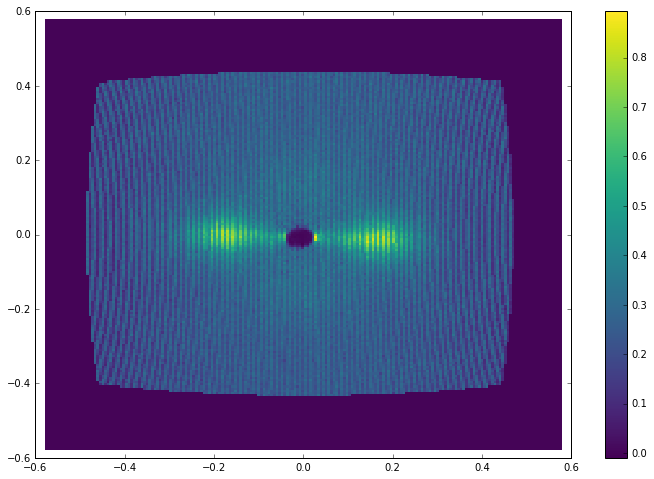

In [72]:
filename = "./Bio-SANS/anisotropy_shoulder_streak-like-scattering-no-peak/high-q_has_shoulder/BioSANS_exp317_scan0064_0001_Iqxy.dat"
data_x, data_y, data_z = get_data(filename)

# Raw image
shape_x = len(np.unique(data_x))
shape_y = len(np.unique(data_y))
X = data_x.reshape(shape_x, shape_y)
Y = data_y.reshape(shape_x, shape_y)
Z = data_z.reshape(shape_x, shape_y)
plt.pcolormesh(X, Y, Z)
plt.colorbar()

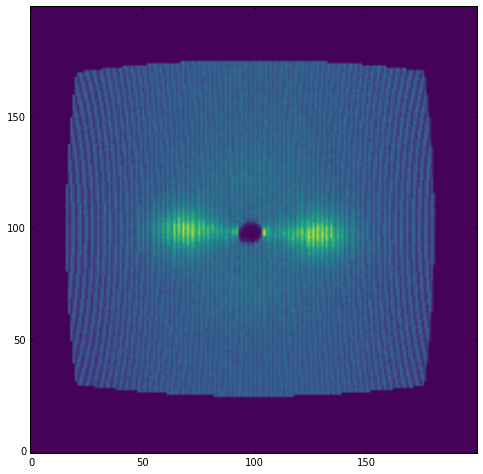

In [73]:
plt.imshow(Z,origin='lower')

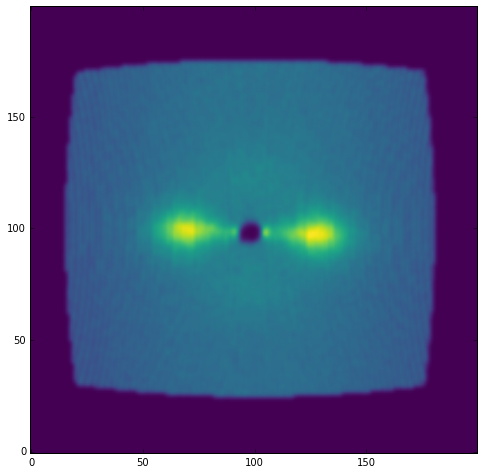

In [74]:
from scipy.ndimage import filters
Z_smooth = filters.gaussian_filter(Z, sigma=1)
plt.imshow(Z_smooth,origin='lower')

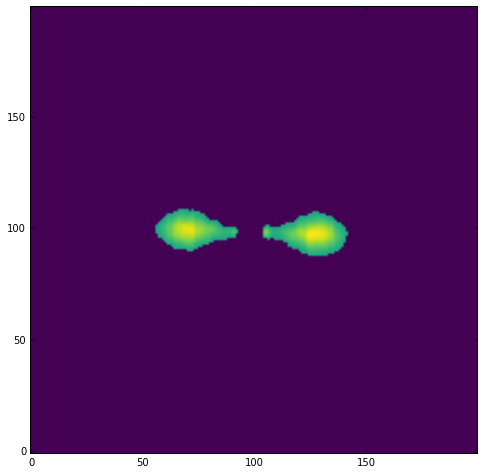

In [75]:
from scipy import ndimage

threshold = 0.4
#Set everything below the threshold to zero:
Z_thresh = np.copy(Z_smooth)
Z_thresh[Z_thresh<threshold] = 0
plt.imshow(Z_thresh,origin='lower')

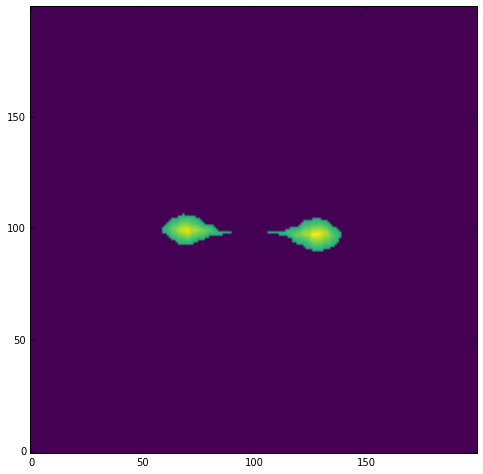

In [76]:
# Erode usefull only when more than 2 zones are found
Z_eroded = ndimage.morphology.grey_erosion(Z_thresh,size=(5,5))
plt.imshow(Z_eroded,origin='lower')

In [77]:
#now find the objects
labeled_image, number_of_objects = ndimage.label(Z_eroded)

centroids = ndimage.center_of_mass(Z_eroded, labeled_image,
                                         np.arange(1, number_of_objects + 1))
centroids = [(j, i) for i, j in centroids]
centroids

[(126.16353549497092, 96.980475627041713),
 (70.721779103685179, 99.052351892534134)]

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Qx=0.154071 Qy=-0.020349
Qx=-0.171513 Qy=-0.00290699


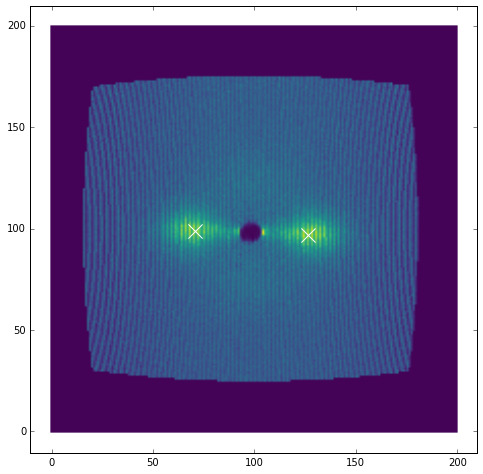

In [81]:
plt.imshow(Z,origin='lower')
X_unique = np.unique(X)
Y_unique = np.unique(Y)

for c in centroids:
    plt.scatter(c[0],c[1],color='white',marker='x', s= 200)
    print("Qx={} Qy={}".format(X_unique[c[0]],Y_unique[c[1]]))